### <p style="text-align: right;"> &#9989; Sahil Bagga</p>

# Day 16 In-Class Assignment
---

## How popular/unpopular is Donald Trump?

<img src="https://i.imgur.com/ZAvZ0ie.png" width=800px>

Data from https://github.com/fivethirtyeight/data

## Fitting approval rating data and making predictions

In this assignment we're going to look at the current president's approval rating as a function of time based on polling data.

* Practice fitting data using the functions provided to you by the Python Packages NumPy and SciPy.
* Using your model and fit to the data, explore how well your model can predict the future.

---
### Loading and viewing the data

On D2L, there is a file named "trump_ratings_first500.csv" make sure you download that file and put it in the same place as this jupyter notebook.

**Task**: Using Pandas, **read in the data file** and **look at the data** by displaying the dataframe or information about the dataframe using some of the Pandas functions you've learned up to this point. Then, **plot the approval and disapproval ratings** to get something that looks similar to the plot above. You'll want to look at the [`plot_date`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot_date.html) function in matplotlib and make use of the 'datenumber' column in the data, which is a number that can be converted into a calendar date. (You can click on the function name to access the documentation)

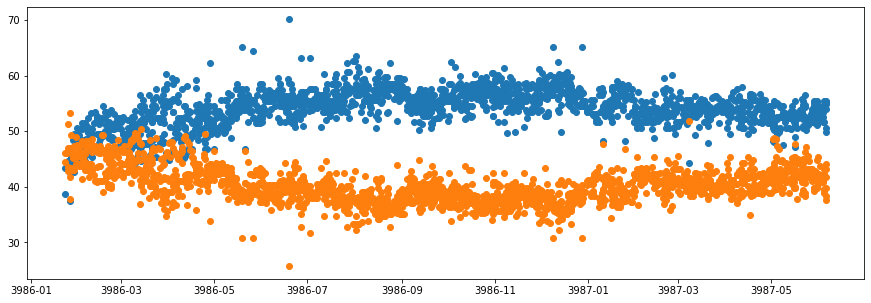

In [1]:
# Put your code here
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('trump_ratings_first500.csv')

plt.figure(figsize=(15,5))
plt.plot_date(data["datenumber"], data["adjusted_disapprove"])
plt.plot_date(data["datenumber"], data["adjusted_approve"])

---
### Linear Regression

As a first pass, your goal is to produce a fit to the data using a linear model. What NumPy function can you use to do this? You should be able to use something that you learned in the pre-class assignment.

**Task**: Create a linear fit to the approval and disapproval ratings using a function from NumPy. **Make a plot of the data along with the best fit line**. What are the parameters for your best fit? **Print out those parameter values**. *Something to think about*: once you have your best fit parameters, what's the easiest way to use those values to plot your model? (*Hint*: there is a NumPy function that takes your fit and creates a function for you)

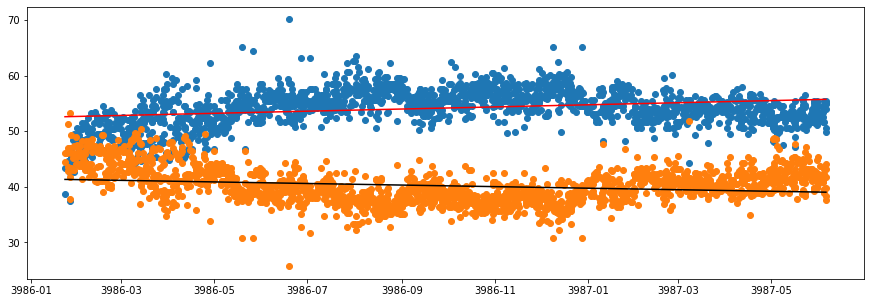

In [2]:
# Put your code here
import numpy as np

poly_parameters_disapprove = np.polyfit(data["datenumber"], data["adjusted_disapprove"], 1)
poly_parameters_approve = np.polyfit(data["datenumber"], data["adjusted_approve"], 1)

my_poly_function_disapprove = np.poly1d(poly_parameters_disapprove)
my_poly_function_approve = np.poly1d(poly_parameters_approve)


# initialize our predicted y values from the my_poly_function created using np.poly1d
expected_y_poly_approve = my_poly_function_approve(data["datenumber"])
expected_y_poly_disapprove = my_poly_function_disapprove(data["datenumber"])                                          

disapprove_fit = np.polyfit(data["datenumber"], data["adjusted_disapprove"], 1)
approve_fit = np.polyfit(data["datenumber"], data["adjusted_approve"], 1)

plt.figure(figsize=(15,5))

plt.plot_date(data["datenumber"], data["adjusted_disapprove"])
plt.plot_date(data["datenumber"], data["adjusted_approve"])

plt.plot(data["datenumber"], expected_y_poly_approve, color = "black", label = "fit")
plt.plot(data["datenumber"], expected_y_poly_disapprove, color = "red", label = "fit")

---
### Higher order fitting

**Task**: Now try fitting the data with a higher order polynomial function. How would you determine how many powers are "enough"? Choose how many powers you want to include in your fit and then **make a plot of your best fit, along with the data, for both approval and disapproval ratings.**

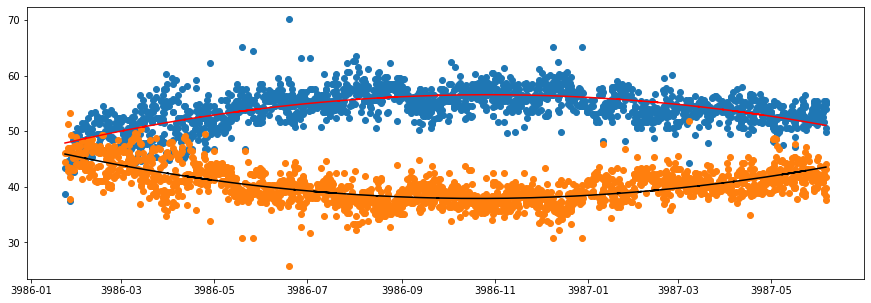

In [4]:
# Put your code here

poly_parameters_disapprove = np.polyfit(data["datenumber"], data["adjusted_disapprove"], 2)
poly_parameters_approve = np.polyfit(data["datenumber"], data["adjusted_approve"], 2)

my_poly_function_disapprove = np.poly1d(poly_parameters_disapprove)
my_poly_function_approve = np.poly1d(poly_parameters_approve)


# initialize our predicted y values from the my_poly_function created using np.poly1d
expected_y_poly_approve = my_poly_function_approve(data["datenumber"])
expected_y_poly_disapprove = my_poly_function_disapprove(data["datenumber"])                                          

'''disapprove_fit = np.polyfit(data["datenumber"], data["adjusted_disapprove"], 2)
approve_fit = np.polyfit(data["datenumber"], data["adjusted_approve"], 2)'''

plt.figure(figsize=(15,5))

plt.plot_date(data["datenumber"], data["adjusted_disapprove"])
plt.plot_date(data["datenumber"], data["adjusted_approve"])

plt.plot(data["datenumber"], expected_y_poly_approve, color = "black", label = "fit")
plt.plot(data["datenumber"], expected_y_poly_disapprove, color = "red", label = "fit")

### Fitting with an arbitrary function

What if we think that the data follows a function with a form that is different than that of a polynomial? This is where curvefit comes in.  Let's try fitting the approval and disapproval ratings using a cosine function, the similar to the one from our pre-class assignment:

$$ f(x) = A \cos (Bx) + C $$

**Task**: Define a python function that computes the above mathematical function and then **use that function to fit the data using SciPy's `curve_fit` function**. Plot the resulting fit along with the data for just the disapproval ratings.

Is $f(x)$ a good choice for fitting the data? If not, is there a reason why this is the case? Does it mean the function is a bad choice or is the `curve_fit` function just not returning sensible results?

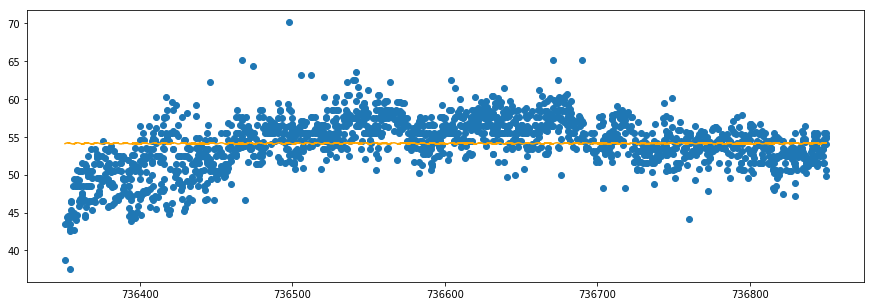

In [5]:
# Put your code here
from scipy.optimize import curve_fit

x_cos = data["datenumber"]
y_cos_disapprove = data["adjusted_disapprove"]
y_cos_approve = data["adjusted_approve"]


def my_cos_function(x, A, B, C):
    
    return A * np.cos(B * x) + C

popt_disapprove, pcov = curve_fit(my_cos_function, x_cos, y_cos_disapprove)
popt_approve, pcov = curve_fit(my_cos_function, x_cos, y_cos_approve)


a_expected_disapprove = popt_disapprove[0]  # get fitted A value
b_expected_disapprove = popt_disapprove[1]  # get fitted B value
c_expected_disapprove = popt_disapprove[2]  # get fitted C value

a_expected_approve = popt_approve[0]  # get fitted A value
b_expected_approve = popt_approve[1]  # get fitted B value
c_expected_approve = popt_approve[2]  # get fitted C value


y_cos_expected_disapprove = my_cos_function(x_cos, a_expected_disapprove, b_expected_disapprove, c_expected_disapprove)
y_cos_expected_approve = my_cos_function(x_cos, a_expected_approve, b_expected_approve, c_expected_approve)

plt.figure(figsize=(15,5))

plt.scatter(x_cos, y_cos_disapprove, label = "data")
#plt.scatter(x_cos, y_cos_approve, label = "data")


plt.plot(x_cos, y_cos_expected_disapprove, color = "orange", label = "fit")
#plt.plot(x_cos, y_cos_expected_approve, color = "green", label = "fit")

---
## Comparing our fit to new data

One of the useful features of coming up with a best fit model to a set of data is that we can use that model to make predictions about what new data might look like.

**Task**: Using your linear fit and another best fit of your choosing, make a plot that predicts an additional **500** days of model rating values for just the disapproval ratings. Specifically, we just want to extend the best fit lines an additional 500 days. *Hint*: This would mean going all the way to a "datenumber" value that is the current max + 500.

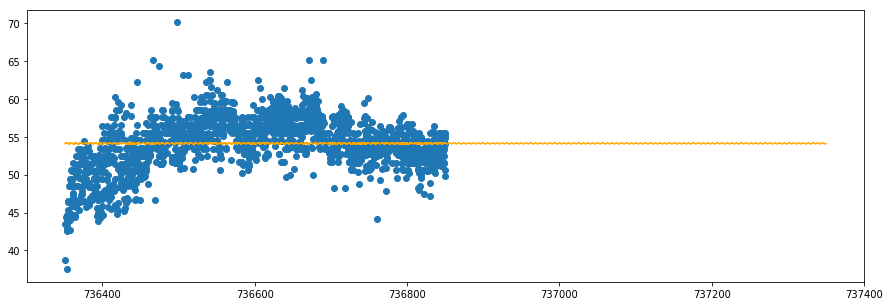

In [10]:
# Put your code here

from scipy.optimize import curve_fit

predict_data = pd.DataFrame({
    'datenumber': np.arange(max(data["datenumber"]), max(data["datenumber"]) + 501, 1)
})
new_data = data.append(predict_data)
x_cos = new_data.datenumber
y_cos_disapprove = data["adjusted_disapprove"]
y_cos_approve = data["adjusted_approve"]


def my_cos_function(x, A, B, C):
    
    return A * np.cos(B * x) + C

popt_disapprove, pcov = curve_fit(my_cos_function, data["datenumber"], y_cos_disapprove)
popt_approve, pcov = curve_fit(my_cos_function, data["datenumber"], y_cos_approve)


a_expected_disapprove = popt_disapprove[0]  # get fitted A value
b_expected_disapprove = popt_disapprove[1]  # get fitted B value
c_expected_disapprove = popt_disapprove[2]  # get fitted C value

a_expected_approve = popt_approve[0]  # get fitted A value
b_expected_approve = popt_approve[1]  # get fitted B value
c_expected_approve = popt_approve[2]  # get fitted C value


y_cos_expected_disapprove = my_cos_function(x_cos, a_expected_disapprove, b_expected_disapprove, c_expected_disapprove)
y_cos_expected_approve = my_cos_function(x_cos, a_expected_approve, b_expected_approve, c_expected_approve)


plt.figure(figsize=(15,5))

y_cos_expected_disapprove
plt.scatter(data["datenumber"], y_cos_disapprove, label = "data")
#plt.scatter(x_cos, y_cos_approve, label = "data")


plt.plot(x_cos, y_cos_expected_disapprove, color = "orange", label = "fit")
#plt.plot(x_cos, y_cos_expected_approve, color = "green", label = "fit")